- Name: Serageldin Monir Abdelmoaty
- ID: 9052380
- Github Repo: https://github.com/sabdelmoaty2380/california-housing-lab/tree/master

<h3><b>Step 1 - Framing the problem</b></h3>

<p><strong>Objective:</strong> Predict the median house value in California using univariate linear regression models.</p>
<p><strong>Independent Variables:</strong> Median income, population, and number of households.</p>
<p><strong>Dependent Variable:</strong> Median house value.</p>
<p><strong>Audience:</strong> Product Managers with high-level knowledge of ML.</p>

<h3><b>Step 2 - Getting the Data</b></h3>

<h4>2.1 - Load the Data</h4>

In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

#load the dataset from my github
url = "http://raw.githubusercontent.com/sabdelmoaty2380/california-housing-lab/refs/heads/master/housing.csv"
df = pd.read_csv(url)

#display the first 5 rows
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<h4>2.2 - Handle the Missing Values</h4>

In [111]:
#filter out outliers using the IQR method
numeric_columns = df.select_dtypes(include=[np.number]).columns

for col in numeric_columns:
    Q1 = df[col].quantile(0.25)  #first Q
    Q3 = df[col].quantile(0.75)  # third Q
    IQR = Q3 - Q1  #IQR
    
    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out the rows where the column value is outside the bounds
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    print(f"Outliers removed from column: {col}")

threshold = 20

#Loop for the columns to see if the missing count less more than the threshold or not
# if it's more so drop them to not affect me
for col in df.columns:
    missing_count = df[col].isnull().sum()
    if missing_count > threshold:
        print(f"Dropping column: {col} (missing values = {missing_count})")
        df.drop(columns=[col], inplace=True)
    else:
        print(f"Filling column: {col} (missing values = {missing_count})")
        # If the column is numeric, fill with mean, otherwise fill with 'Unknown'
        if df[col].dtype == 'object':
            df[col] = df[col].fillna('Unknown')  # Avoid inplace=True
        else:
            df[col] = df[col].fillna(df[col].mean())  # Avoid inplace=True

Outliers removed from column: longitude
Outliers removed from column: latitude
Outliers removed from column: housing_median_age
Outliers removed from column: total_rooms
Outliers removed from column: total_bedrooms
Outliers removed from column: population
Outliers removed from column: households
Outliers removed from column: median_income
Outliers removed from column: median_house_value
Filling column: longitude (missing values = 0)
Filling column: latitude (missing values = 0)
Filling column: housing_median_age (missing values = 0)
Filling column: total_rooms (missing values = 0)
Filling column: total_bedrooms (missing values = 0)
Filling column: population (missing values = 0)
Filling column: households (missing values = 0)
Filling column: median_income (missing values = 0)
Filling column: median_house_value (missing values = 0)
Filling column: ocean_proximity (missing values = 0)


<h4>2.3 - Encode Categorical Values</h4>

In [112]:
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

<h4>2.5 Normalize/Scale Features</h4>

In [113]:
scaler = StandardScaler()
numerical_features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

<h3><b>Step 3 - Exploratory Data Analysis (EDA)</b></h3>   

          longitude      latitude  housing_median_age   total_rooms  \
count  1.672500e+04  1.672500e+04        1.672500e+04  1.672500e+04   
mean   7.405788e-15 -1.085038e-15        2.888903e-17  2.115697e-16   
std    1.000030e+00  1.000030e+00        1.000030e+00  1.000030e+00   
min   -2.360946e+00 -1.461228e+00       -2.345334e+00 -2.021084e+00   
25%   -1.084427e+00 -8.171531e-01       -8.721664e-01 -7.067758e-01   
50%    4.513842e-01 -6.009280e-01        2.810299e-02 -1.365262e-01   
75%    7.904594e-01  9.356505e-01        6.828444e-01  5.987442e-01   
max    2.555645e+00  2.867875e+00        1.828642e+00  3.531038e+00   

       total_bedrooms    population    households  median_income  \
count    1.672500e+04  1.672500e+04  1.672500e+04   1.672500e+04   
mean    -9.813774e-17 -1.673865e-16  1.188486e-16   3.568645e-17   
std      1.000030e+00  1.000030e+00  1.000030e+00   1.000030e+00   
min     -2.118576e+00 -2.088220e+00 -2.136563e+00  -2.127728e+00   
25%     -7.218376e-0

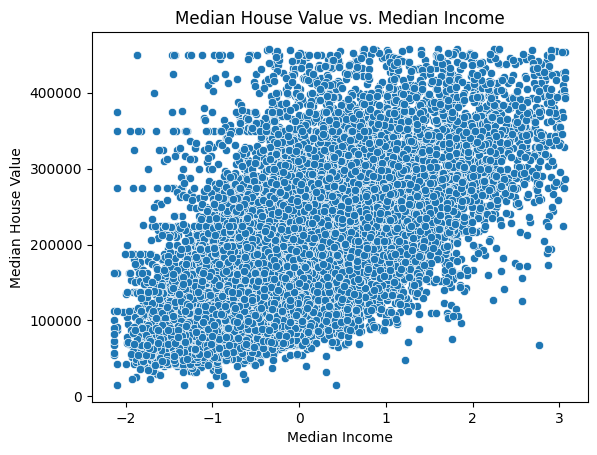

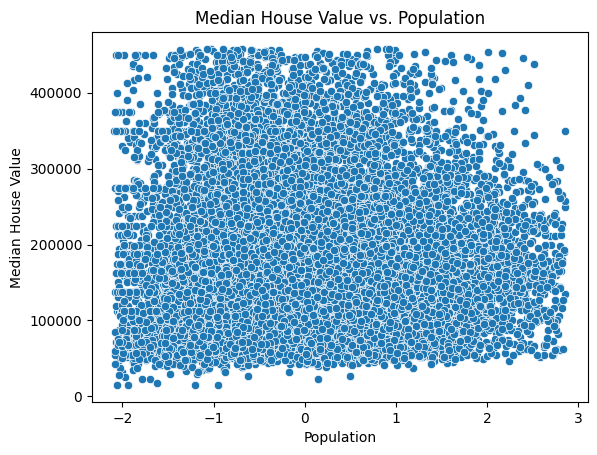

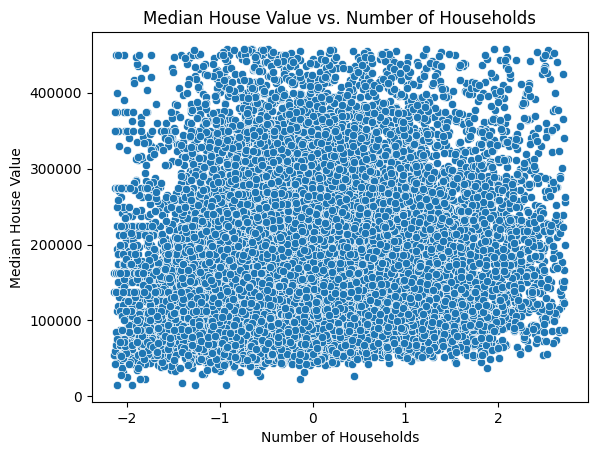

In [114]:
#getting the most useful information about the data like the mean
print(df.describe())


# Scatterplot of median_income vs median_house_value
# Scatter plot for median house value vs median income
sns.scatterplot(x=df['median_income'], y=df['median_house_value'])
plt.title('Median House Value vs. Median Income')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

# Scatter plot for median house value vs population
sns.scatterplot(x=df['population'], y=df['median_house_value'])
plt.title('Median House Value vs. Population')
plt.xlabel('Population')
plt.ylabel('Median House Value')
plt.show()

# Scatter plot for median house value vs number of households
sns.scatterplot(x=df['households'], y=df['median_house_value'])
plt.title('Median House Value vs. Number of Households')
plt.xlabel('Number of Households')
plt.ylabel('Median House Value')
plt.show()


This heatmap reveals key correlations in the dataset. Bedrooms and rooms show a strong positive relationship, as do households and population. Income and house value are positively correlated, indicating wealthier areas have higher home prices. Conversely, bedrooms per room negatively correlate with income, suggesting lower-income areas have denser housing. Latitude and longitude show a strong inverse correlation, likely representing a specific region. Population per household and rooms per household have weaker correlations, meaning they have less impact on housing trends. These insights help identify key patterns for further analysis. Let me know if you want a deeper focus on any variable!

<h3><b>Step 4 - Linear Regressions</b></h3>   

In [115]:
X = df[['median_income', 'population', 'households']]  # Independent variables
y = df['median_house_value']  # Dependent variable

#first split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#init the model
model = LinearRegression()

#model 1: Median House Value vs Median Income
X_income_train = X_train[['median_income']]
X_income_test = X_test[['median_income']]
model.fit(X_income_train, y_train)
y_pred_income = model.predict(X_income_test)

#calculate performance metrics (MSE and MAE)
mse_income = mean_squared_error(y_test, y_pred_income)
mae_income = mean_absolute_error(y_test, y_pred_income)
intercept_income = model.intercept_
slope_income = model.coef_[0]

#model 2: Median House Value vs Population
X_population_train = X_train[['population']]
X_population_test = X_test[['population']]
model.fit(X_population_train, y_train)
y_pred_population = model.predict(X_population_test)
mse_population = mean_squared_error(y_test, y_pred_population)
mae_population = mean_absolute_error(y_test, y_pred_population)
intercept_population = model.intercept_
slope_population = model.coef_[0]

#model 3: Median House Value vs Number of Households
X_households_train = X_train[['households']]
X_households_test = X_test[['households']]
model.fit(X_households_train, y_train)
y_pred_households = model.predict(X_households_test)
mse_households = mean_squared_error(y_test, y_pred_households)
mae_households = mean_absolute_error(y_test, y_pred_households)
intercept_households = model.intercept_
slope_households = model.coef_[0]



<h3><b>Step 5 - In a single table for all three linear regressions, provide per regression</b></h3>     

In [116]:
regression_results = pd.DataFrame({
    "Model": ["Median House Value vs Median Income", "Median House Value vs Population", "Median House Value vs Households"],
    "Intercept": [intercept_income, intercept_population, intercept_households],
    "Slope": [slope_income, slope_population, slope_households],
    "MSE": [mse_income, mse_population, mse_households],
    "MAE": [mae_income, mae_population, mae_households]
})

print(regression_results)

                                 Model      Intercept         Slope  \
0  Median House Value vs Median Income  185626.807777  58471.204341   
1     Median House Value vs Population  185926.232282   -902.376324   
2     Median House Value vs Households  185942.558378  10930.215072   

            MSE           MAE  
0  4.962247e+09  54249.567897  
1  8.292777e+09  73772.099088  
2  8.150919e+09  73059.114810  


<h3><b>Step 6 - Plot the resulting line on top of the scatter data</b></h3>     

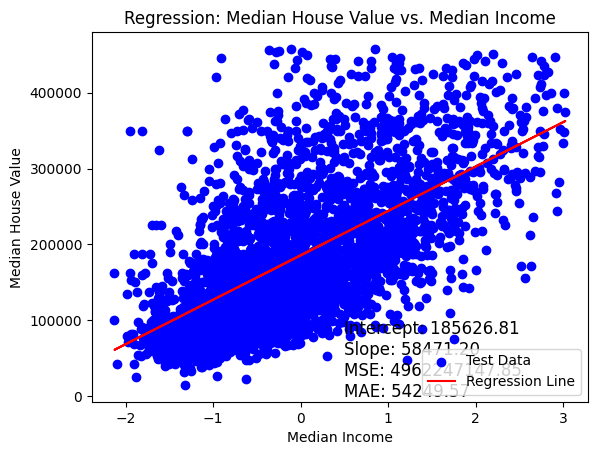

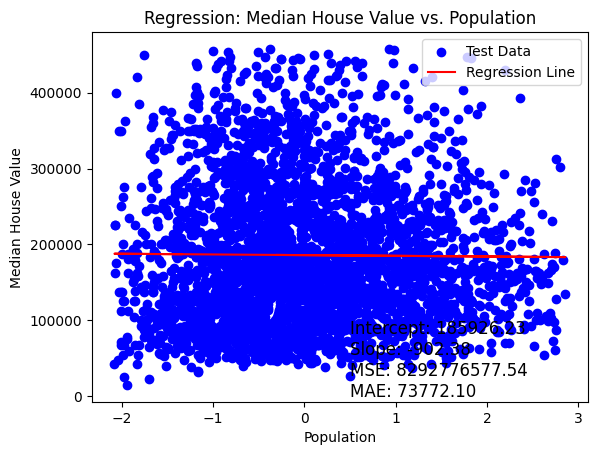

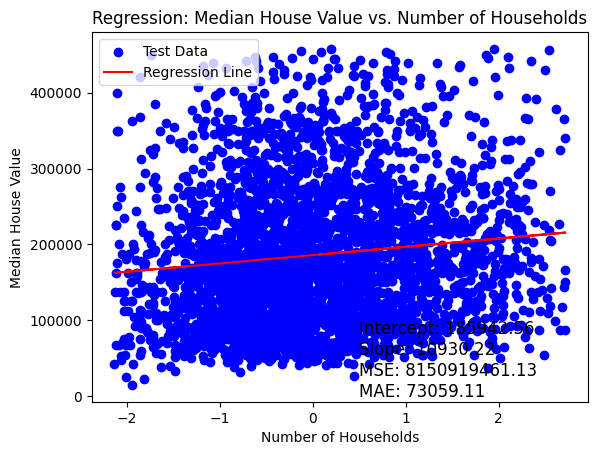

In [117]:
# 5. Plot the regression lines on top of the scatter data (test set)
# Plot for Median House Value vs Median Income
plt.scatter(X_income_test, y_test, color='blue', label='Test Data')
plt.plot(X_income_test, y_pred_income, color='red', label='Regression Line')
plt.title('Regression: Median House Value vs. Median Income')
plt.text(0.5, 0.8, f'Intercept: {intercept_income:.2f}\nSlope: {slope_income:.2f}\nMSE: {mse_income:.2f}\nMAE: {mae_income:.2f}', fontsize=12)
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.legend()
plt.show()

# Plot for Median House Value vs Population
plt.scatter(X_population_test, y_test, color='blue', label='Test Data')
plt.plot(X_population_test, y_pred_population, color='red', label='Regression Line')
plt.title('Regression: Median House Value vs. Population')
plt.text(0.5, 0.8, f'Intercept: {intercept_population:.2f}\nSlope: {slope_population:.2f}\nMSE: {mse_population:.2f}\nMAE: {mae_population:.2f}', fontsize=12)
plt.xlabel('Population')
plt.ylabel('Median House Value')
plt.legend()
plt.show()

# Plot for Median House Value vs Number of Households
plt.scatter(X_households_test, y_test, color='blue', label='Test Data')
plt.plot(X_households_test, y_pred_households, color='red', label='Regression Line')
plt.title('Regression: Median House Value vs. Number of Households')
plt.text(0.5, 0.8, f'Intercept: {intercept_households:.2f}\nSlope: {slope_households:.2f}\nMSE: {mse_households:.2f}\nMAE: {mae_households:.2f}', fontsize=12)
plt.xlabel('Number of Households')
plt.ylabel('Median House Value')
plt.legend()
plt.show()

<h3><b>Step 7 - Conclusion</b></h3>     

<h4>Key Observations</h4>
<p>
    <b>Median Income is the Best Predictor:</b> 
    Among the variables analyzed, median income demonstrates the strongest correlation with median house value. Its low error values and steep slope suggest that it accounts for the variation in house values more effectively than population or household count.
</p>

<p>
    <b>Population is a Poor Predictor:</b> 
    Despite its significance in demographic studies, population exhibits no meaningful relationship with house value in this dataset, as evidenced by the nearly flat regression line and high error metrics.
</p>

<p>
    <b>Number of Households has Limited Predictive Power:</b> 
    Although it shows a positive relationship with house value, the association is relatively weak, and the error values are significantly higher compared to those of median income.
</p>